In [1]:
#import modules needed
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
import sklearn
# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

__Read in cleaned dataset__

In [2]:
df = df = pd.read_csv('availbikes2.csv', sep=',\s+', delimiter=',')

In [3]:
#shuffle 
df=sklearn.utils.shuffle(df)

In [4]:
df.head()

StationNumber  available_bikes_stands  available_bikes    description  \
264995              6                      19                1     few clouds   
297914             52                      21               11  moderate rain   
251204             67                      18               22  broken clouds   
420329            100                      14               11  broken clouds   
243785            107                      25               15  broken clouds   

        temp  temp_min  temp_max  humidity      Day  Hour  
264995     7         6         8        93  Tuesday    22  
297914     7         7         7        57   Friday    13  
251204     8         8         9        76   Monday    20  
420329     5         5         6        70   Monday     5  
243785     8         7         8        71   Monday     7

__Drop columns not needed for model__:

In [5]:
df=df.drop(['temp_min', 'temp_max', 'humidity'], axis=1)

In [6]:
df

StationNumber  available_bikes_stands  available_bikes  \
264995              6                      19                1   
297914             52                      21               11   
251204             67                      18               22   
420329            100                      14               11   
243785            107                      25               15   
...               ...                     ...              ...   
163353              2                       6               14   
202932             87                      12               26   
387923            108                      24               16   
324698             42                      18               11   
88757              94                      33                7   

             description  temp      Day  Hour  
264995        few clouds     7  Tuesday    22  
297914     moderate rain     7   Friday    13  
251204     broken clouds     8   Monday    20  
420329     broken clouds     5   Monday     5  
243785     broken clouds     8   Monday     7  
...                  ...   ...      ...   ...  
163353     broken clouds    11   Monday    23  
202932  scattered clouds     9   Friday     1  
387923        few clouds     9   Friday    15  
324698     moderate rain    13   Sunday    16  
88757         light rain     9  Tuesday    20  

[449636 rows x 7 columns]

__View All the Unique station numbers__

In [7]:
df.StationNumber.unique()

array([  6,  52,  67, 100, 107,  73,  58,  69, 112,  22,  84,  97, 117,
        43,  34,  75,  78,  24,  26,  48,  80,  82, 110, 103,  99,  83,
       101,  50,  13, 115, 111,  25,  31,  89,  85,  76,  72,  27, 108,
        15,  53,  37,  32,  88,  68, 106, 105,  98,  21,  18,  61,  42,
       114,  79,  57,  62,  44,  66,  55,  28,   7,  77,  74,  33,  56,
         9,  90, 102,  49,  30,  47,  12,  92, 113, 104,   8,  40,  29,
        96,  91,  11,  45,  16,  51,  19,  10,  36,   2,  87,  41, 109,
        39,  71,   3,  95,   4,  63,   5,  54,  59, 116,  93,  64,  94,
        38,  86,  23, 507,  17,  65], dtype=int64)

__Define a function to encode data__

In [8]:
def label_enocder(data, list_cat_cols):
    '''
    Apply Label encoder to the categorical columns (list_cat_cols) in data
    
    '''
    
    #Create Label Encoder 
    for column_name in list_cat_cols:
        #Apply label encoder to each column
        le = preprocessing.LabelEncoder()
        data[column_name + 'NEW'] = preprocessing.LabelEncoder().fit_transform(data[column_name])
        
    return data


__Declare Categorical Data__

In [9]:
list_le_cols=['description', 'Day']

In [10]:
df =  label_enocder(df, list_le_cols)

__Store list for categorical columns in list to create a dictionary of original and encoded values for re-encoding in flask__

In [11]:
descriptionNEW_vals = df['descriptionNEW'].unique().tolist()
DayNEW_vals = df['DayNEW'].unique().tolist()

__Create Dictionaries to store the original and encoded values for each categorical Feature__

In [12]:
description_dict={}
for vals in descriptionNEW_vals:
    description_dict[df.loc[df['descriptionNEW'] == vals, 'description'].iloc[0]]=vals
description_dict

{'few clouds': 2,
 'moderate rain': 8,
 'broken clouds': 0,
 'clear sky': 1,
 'mist': 7,
 'scattered clouds': 10,
 'light rain': 5,
 'overcast clouds': 9,
 'heavy intensity rain': 3,
 'light intensity drizzle': 4,
 'light snow': 6}

In [13]:
DayDict={}
for vals in DayNEW_vals:
    DayDict[df.loc[df['DayNEW'] == vals, 'Day'].iloc[0]]=vals
DayDict  

{'Tuesday': 5,
 'Friday': 0,
 'Monday': 1,
 'Thursday': 4,
 'Saturday': 2,
 'Sunday': 3,
 'Wednesday': 6}

In [14]:
#drop the un encoded cat columns
df = df.drop(['Day', 'description'], axis=1)

In [15]:
df

StationNumber  available_bikes_stands  available_bikes  temp  Hour  \
264995              6                      19                1     7    22   
297914             52                      21               11     7    13   
251204             67                      18               22     8    20   
420329            100                      14               11     5     5   
243785            107                      25               15     8     7   
...               ...                     ...              ...   ...   ...   
163353              2                       6               14    11    23   
202932             87                      12               26     9     1   
387923            108                      24               16     9    15   
324698             42                      18               11    13    16   
88757              94                      33                7     9    20   

        descriptionNEW  DayNEW  
264995               2       5  
297914               8       0  
251204               0       1  
420329               0       1  
243785               0       1  
...                ...     ...  
163353               0       1  
202932              10       0  
387923               2       0  
324698               8       3  
88757                5       5  

[449636 rows x 7 columns]

__Seperate Dataframe into a list of df's grouped by station number__

In [16]:
dfseperated = [x for _, x in df.groupby('StationNumber')]
        

In [17]:
dfseperated[0]

StationNumber  available_bikes_stands  available_bikes  temp  Hour  \
386617              2                      17                3     9    13   
225227              2                      18                2    10    18   
284784              2                      12                8    11    12   
6016                2                      10               10     5     4   
146466              2                       4               16    10    14   
...               ...                     ...              ...   ...   ...   
262779              2                      19                1    11    18   
377199              2                      10               10     7    19   
344329              2                      20                0    10     8   
427544              2                      14                6     4    18   
163353              2                       6               14    11    23   

        descriptionNEW  DayNEW  
386617               2       0  
225227              10       2  
284784              10       4  
6016                 0       6  
146466               5       3  
...                ...     ...  
262779               0       5  
377199              10       4  
344329              10       5  
427544               2       1  
163353               0       1  

[4069 rows x 7 columns]

__Declare Target Values__

In [18]:
predict = 'available_bikes'

In [19]:
predictStands='available_bikes_stands'

__Store Station Numbers in List - Visualisation Purposes__

In [20]:
stations=[]
for index in range(len(dfseperated)):
    stations+=[dfseperated[index].StationNumber.unique().tolist()]
len(stations)

110

__KNeighbors Classifier for Bikes Available - Each station model stored in a dict__

Station Number: 2
Accuracy:  45.82309582309582


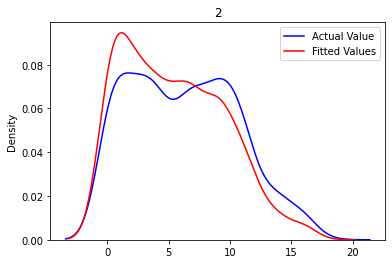

Station Number: 3
Accuracy:  46.13526570048309


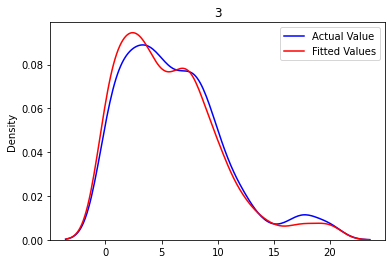

Station Number: 4
Accuracy:  49.167733674775924


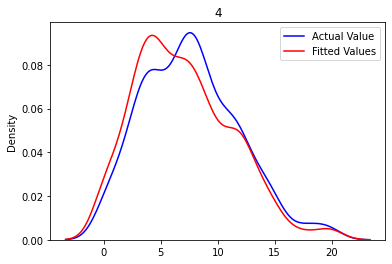

Station Number: 5
Accuracy:  33.43915343915344


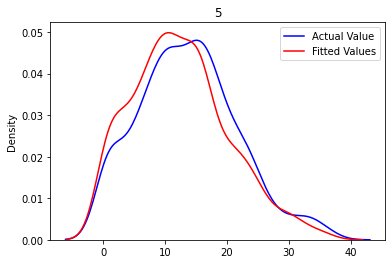

Station Number: 6
Accuracy:  50.80946450809465


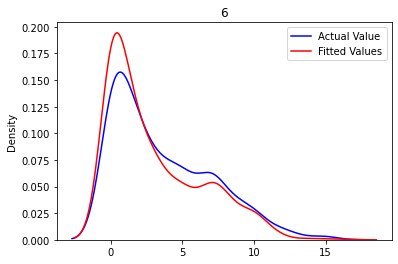

Station Number: 7
Accuracy:  51.27877237851662


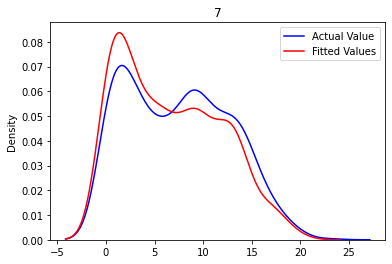

Station Number: 8
Accuracy:  42.69005847953216


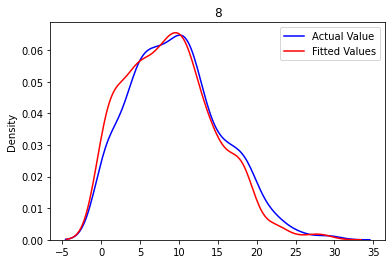

Station Number: 9
Accuracy:  31.34020618556701


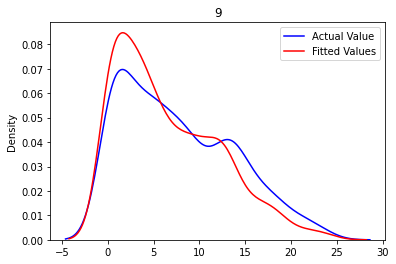

Station Number: 10
Accuracy:  39.816933638443935


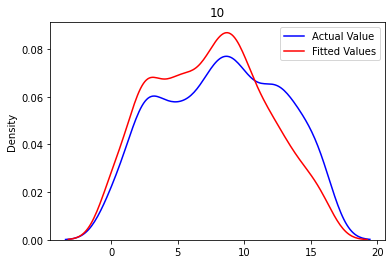

Station Number: 11
Accuracy:  65.0137741046832


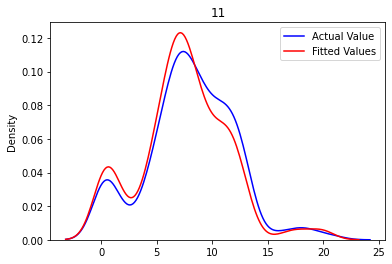

Station Number: 12
Accuracy:  47.713226205191596


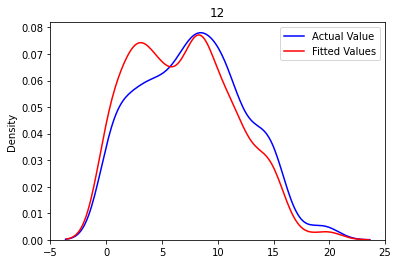

Station Number: 13
Accuracy:  60.31957390146472


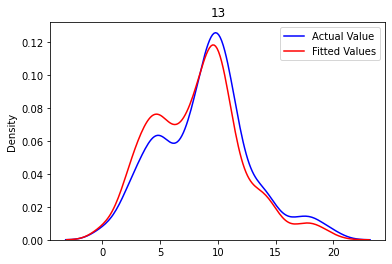

Station Number: 15
Accuracy:  56.17367706919946


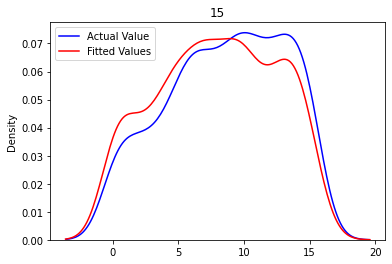

Station Number: 16
Accuracy:  61.48738379814077


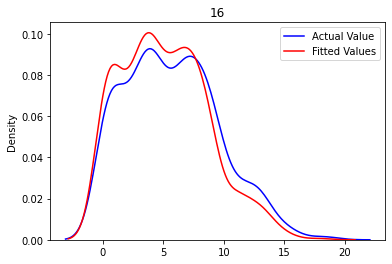

Station Number: 17
Accuracy:  50.563204005006256


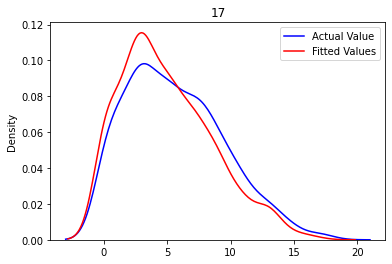

Station Number: 18
Accuracy:  36.91275167785235


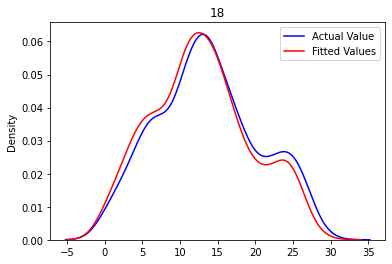

Station Number: 19
Accuracy:  29.927007299270077


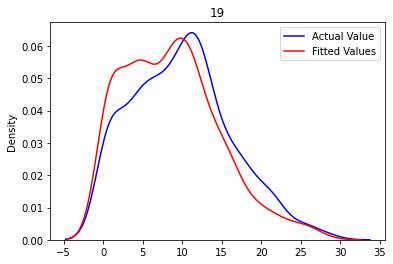

Station Number: 21
Accuracy:  43.88235294117647


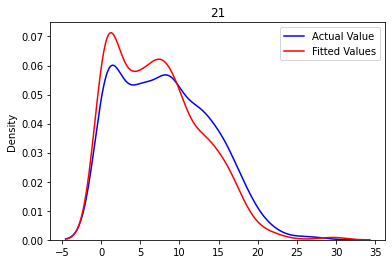

Station Number: 22
Accuracy:  47.965474722564736


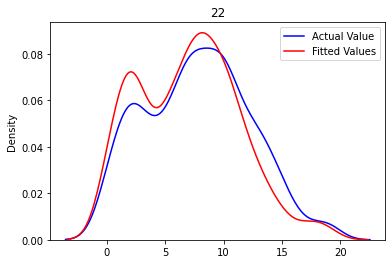

Station Number: 23
Accuracy:  41.60919540229885


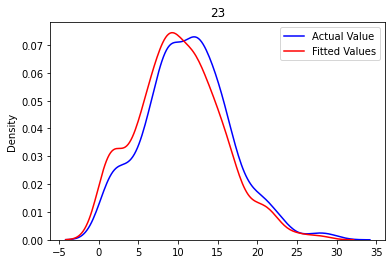

Station Number: 24
Accuracy:  36.84210526315789


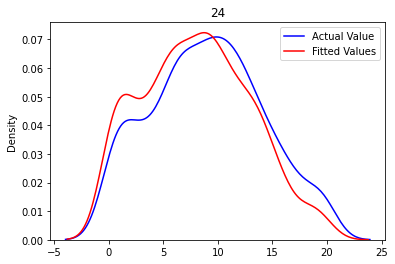

Station Number: 25
Accuracy:  52.056555269922875


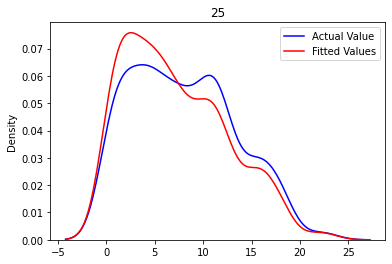

Station Number: 26
Accuracy:  56.26631853785901


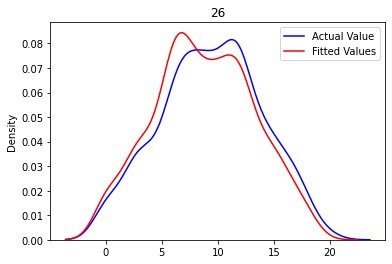

Station Number: 27
Accuracy:  50.4914004914005


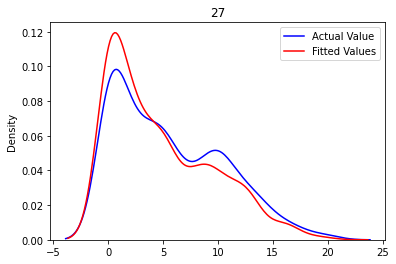

Station Number: 28
Accuracy:  44.642857142857146


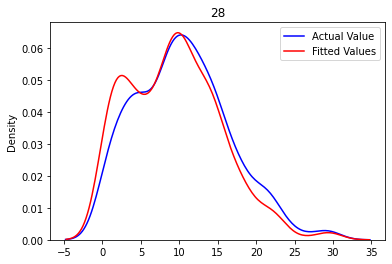

Station Number: 29
Accuracy:  38.90134529147982


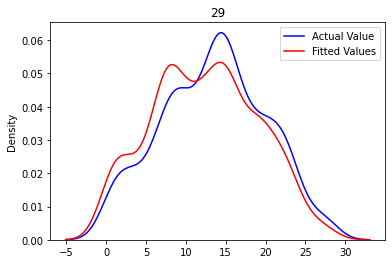

Station Number: 30
Accuracy:  60.7095926412615


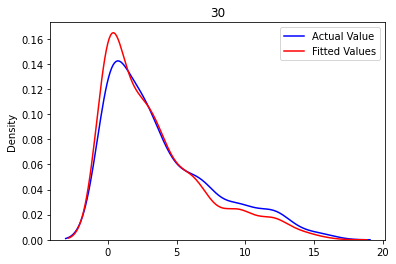

Station Number: 31
Accuracy:  36.041666666666664


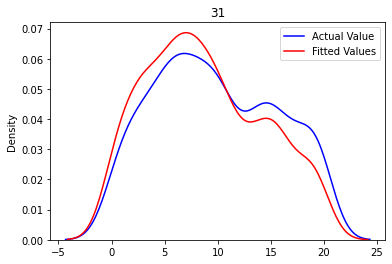

Station Number: 32
Accuracy:  43.184559710494575


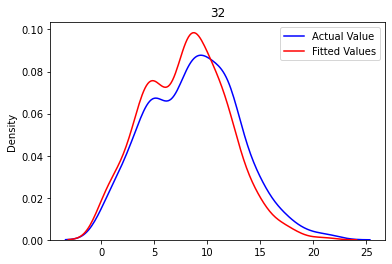

Station Number: 33
Accuracy:  27.48768472906404


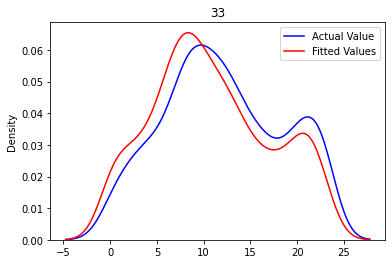

Station Number: 34
Accuracy:  28.838582677165352


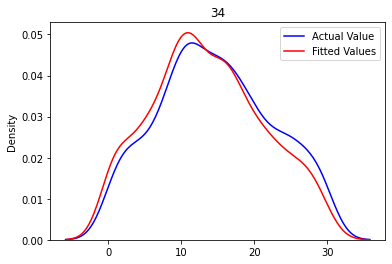

Station Number: 36
Accuracy:  50.31525851197982


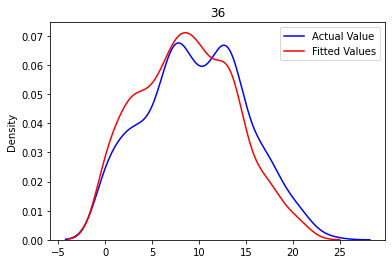

Station Number: 37
Accuracy:  62.0


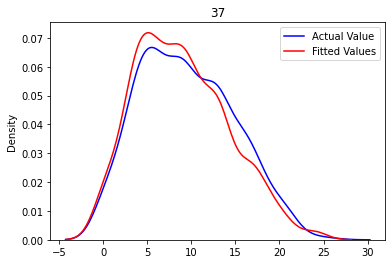

Station Number: 38
Accuracy:  34.2511013215859


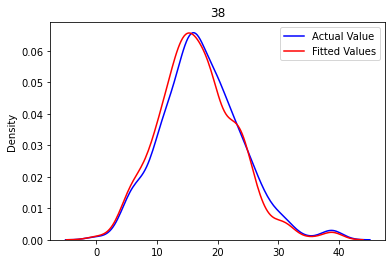

Station Number: 39
Accuracy:  42.15349369988545


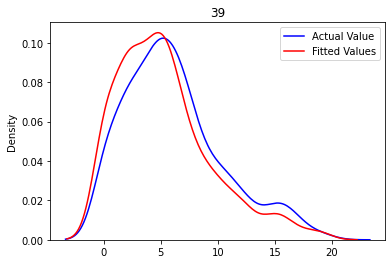

Station Number: 40
Accuracy:  43.03944315545243


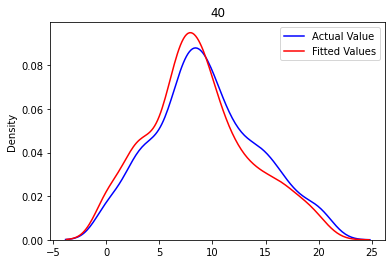

Station Number: 41
Accuracy:  63.03191489361703


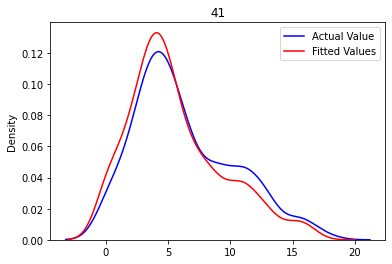

Station Number: 42
Accuracy:  34.508547008547005


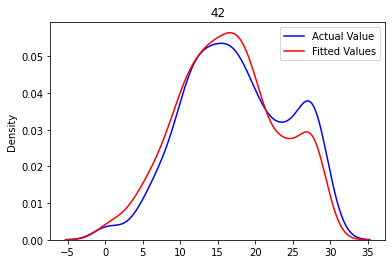

Station Number: 43
Accuracy:  32.608695652173914


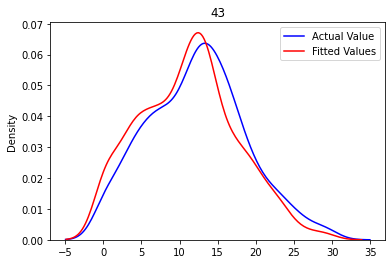

Station Number: 44
Accuracy:  30.29350104821803


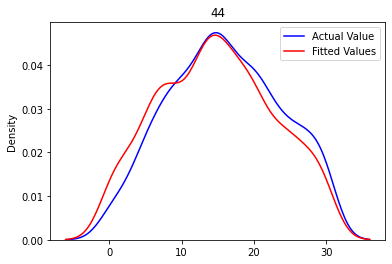

Station Number: 45
Accuracy:  50.374064837905244


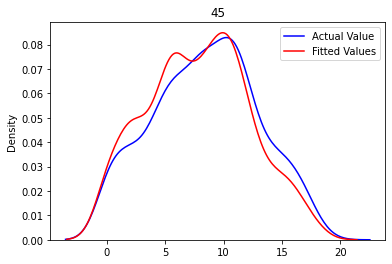

Station Number: 47
Accuracy:  63.575268817204304


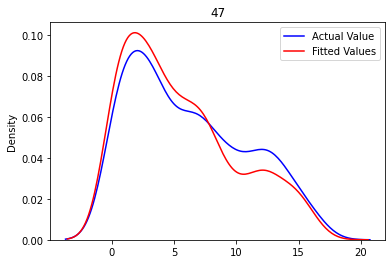

Station Number: 48
Accuracy:  39.64285714285714


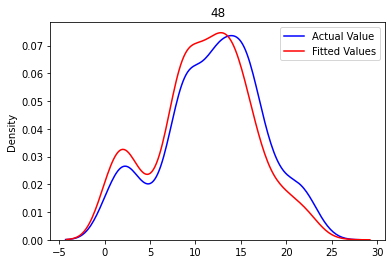

Station Number: 49
Accuracy:  41.19638826185101


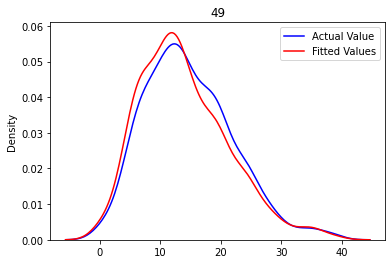

Station Number: 50
Accuracy:  35.706580366774546


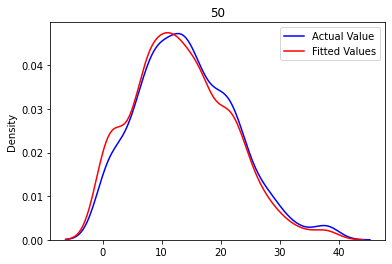

Station Number: 51
Accuracy:  56.23376623376623


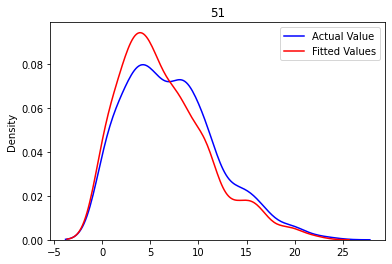

Station Number: 52
Accuracy:  45.077105575326215


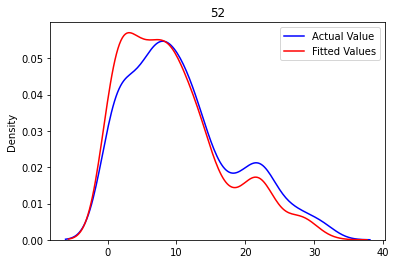

Station Number: 53
Accuracy:  68.26923076923077


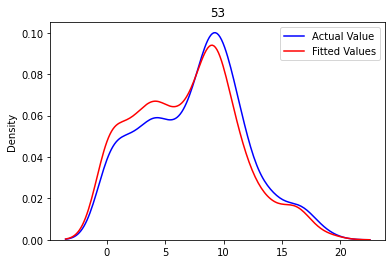

Station Number: 54
Accuracy:  61.41304347826087


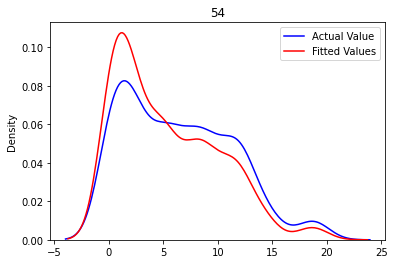

Station Number: 55
Accuracy:  70.60478199718706


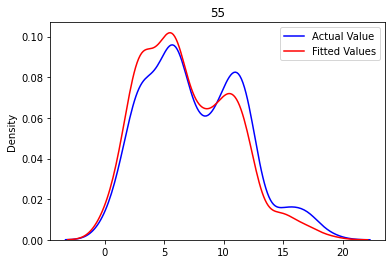

Station Number: 56
Accuracy:  37.74834437086093


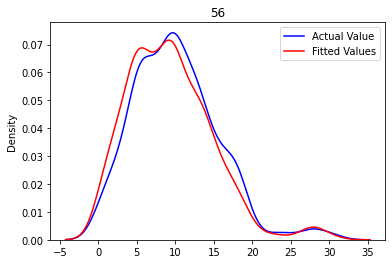

Station Number: 57
Accuracy:  54.0962288686606


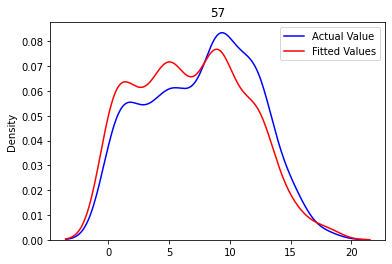

Station Number: 58
Accuracy:  39.327146171693734


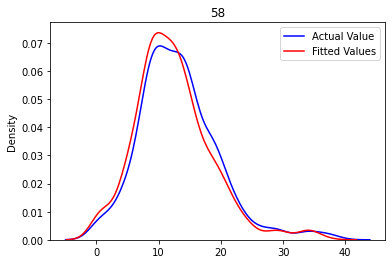

Station Number: 59
Accuracy:  50.31685678073511


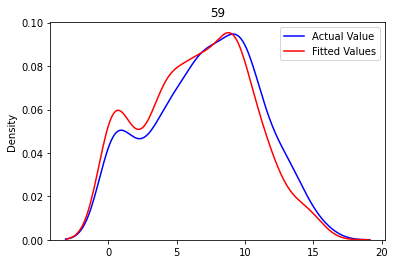

Station Number: 61
Accuracy:  53.46153846153846


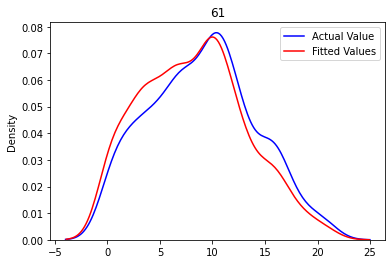

Station Number: 62
Accuracy:  61.41522029372497


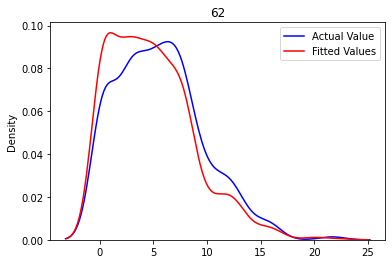

Station Number: 63
Accuracy:  54.25950196592398


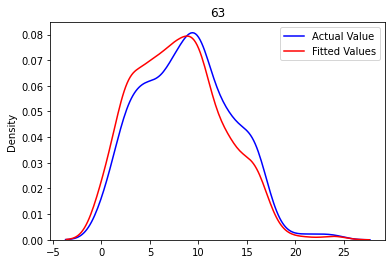

Station Number: 64
Accuracy:  47.47225647348952


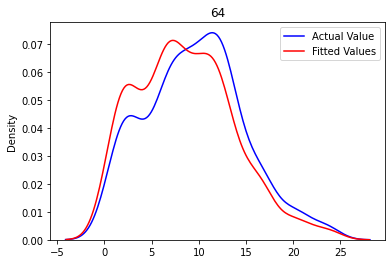

Station Number: 65
Accuracy:  57.54716981132076


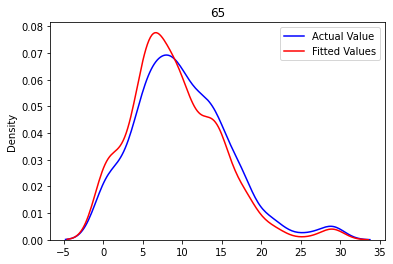

Station Number: 66
Accuracy:  38.10597519729425


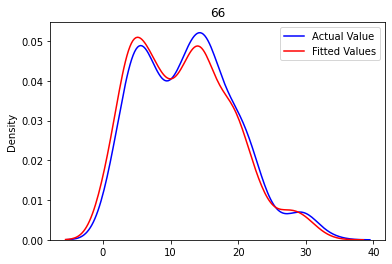

Station Number: 67
Accuracy:  36.434108527131784


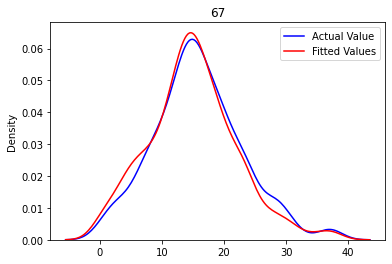

Station Number: 68
Accuracy:  38.72387238723872


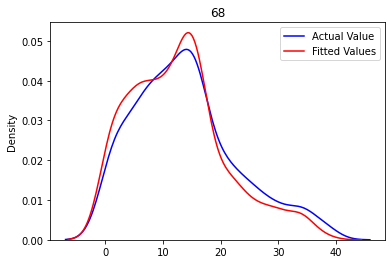

Station Number: 69
Accuracy:  27.264150943396224


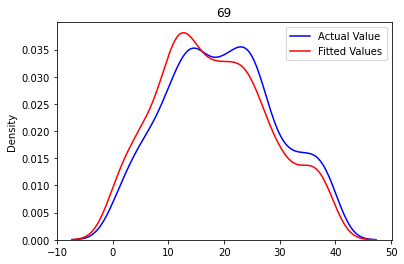

Station Number: 71
Accuracy:  45.2991452991453


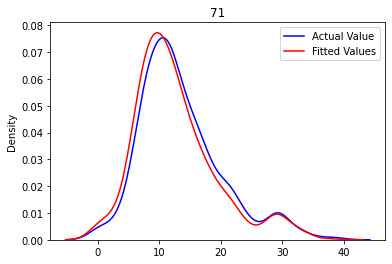

Station Number: 72
Accuracy:  40.968122786304605


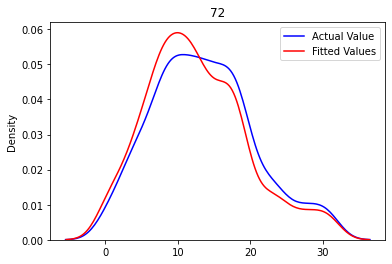

Station Number: 73
Accuracy:  39.01035673187572


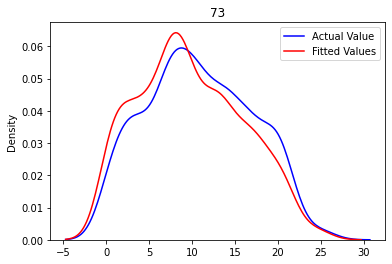

Station Number: 74
Accuracy:  46.144721233689204


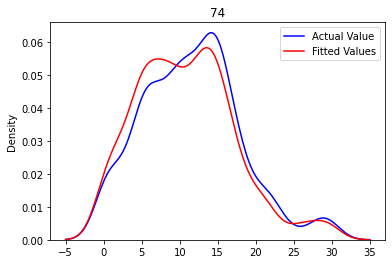

Station Number: 75
Accuracy:  43.565525383707204


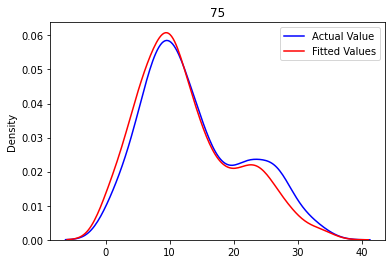

Station Number: 76
Accuracy:  55.159235668789805


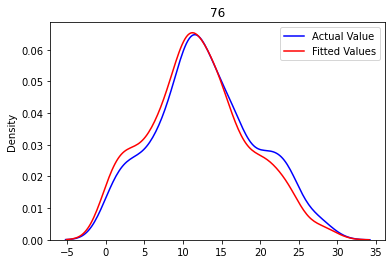

Station Number: 77
Accuracy:  43.1764705882353


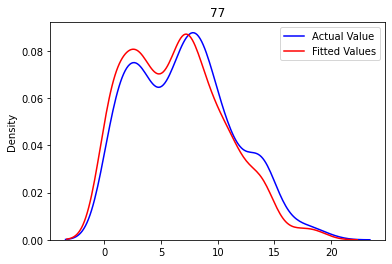

Station Number: 78
Accuracy:  40.46511627906977


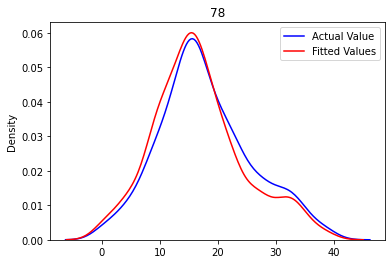

Station Number: 79
Accuracy:  54.39276485788114


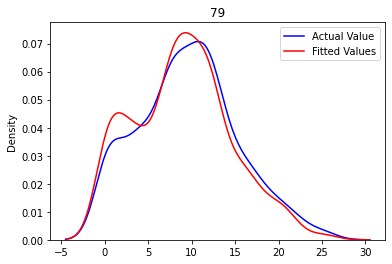

Station Number: 80
Accuracy:  42.48826291079813


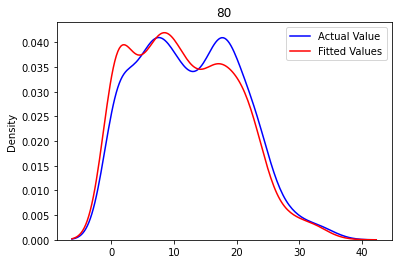

Station Number: 82
Accuracy:  59.81675392670157


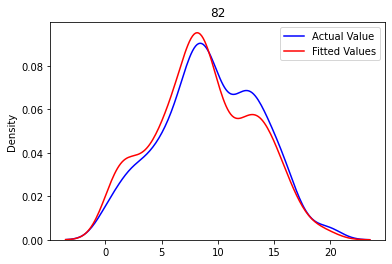

Station Number: 83
Accuracy:  48.77149877149877


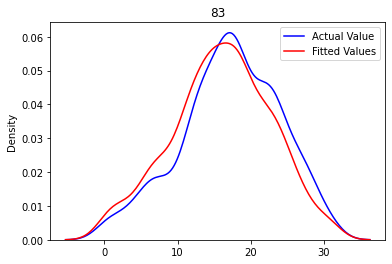

Station Number: 84
Accuracy:  46.9059405940594


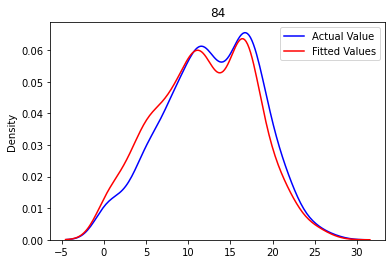

Station Number: 85
Accuracy:  50.69885641677255


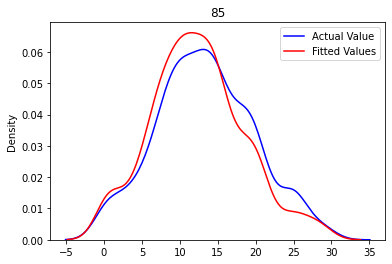

Station Number: 86
Accuracy:  42.70952927669345


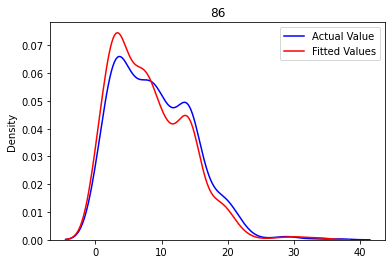

Station Number: 87
Accuracy:  42.632850241545896


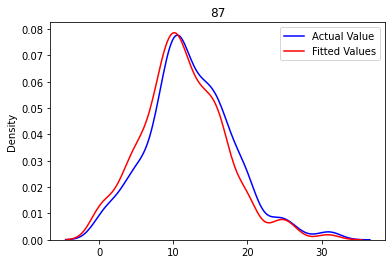

Station Number: 88
Accuracy:  43.86391251518834


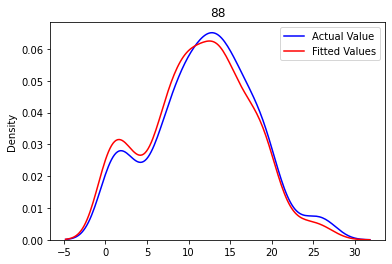

Station Number: 89
Accuracy:  63.793103448275865


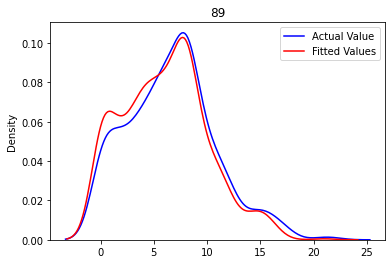

Station Number: 90
Accuracy:  47.3621103117506


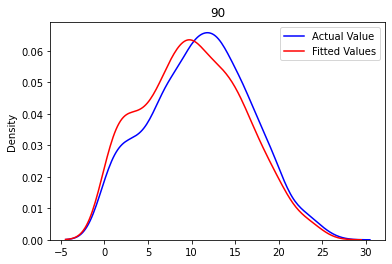

Station Number: 91
Accuracy:  37.87047200878156


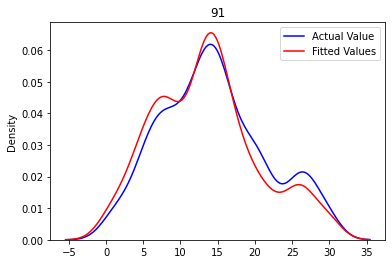

Station Number: 92
Accuracy:  42.5904317386231


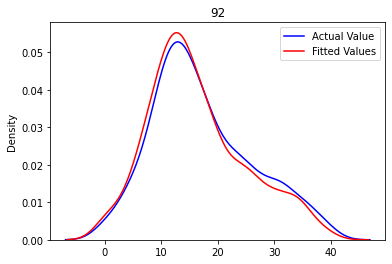

Station Number: 93
Accuracy:  75.03586800573888


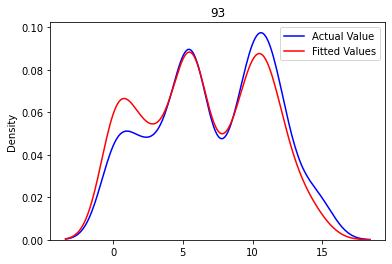

Station Number: 94
Accuracy:  81.68812589413447


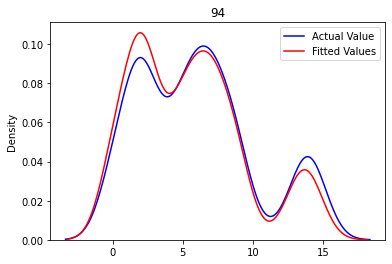

Station Number: 95
Accuracy:  43.05717619603267


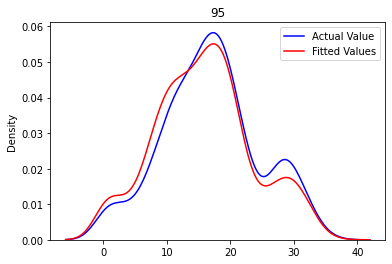

Station Number: 96
Accuracy:  64.35786435786436


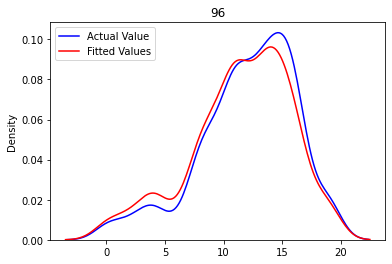

Station Number: 97
Accuracy:  39.569160997732425


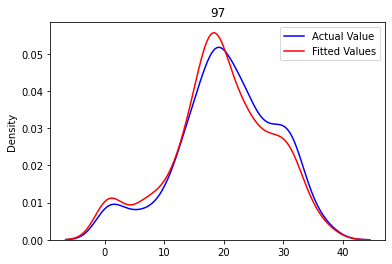

Station Number: 98
Accuracy:  66.30872483221476


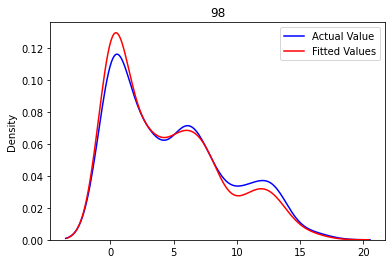

Station Number: 99
Accuracy:  60.07853403141361


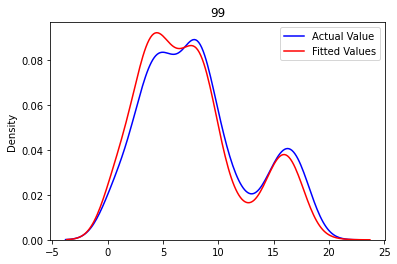

Station Number: 100
Accuracy:  43.048780487804876


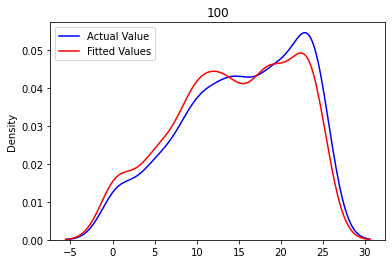

Station Number: 101
Accuracy:  38.64168618266979


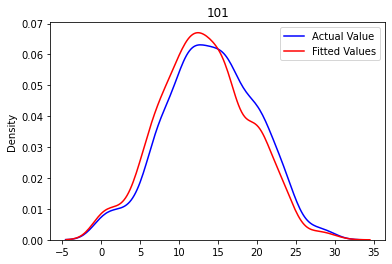

Station Number: 102
Accuracy:  56.52173913043478


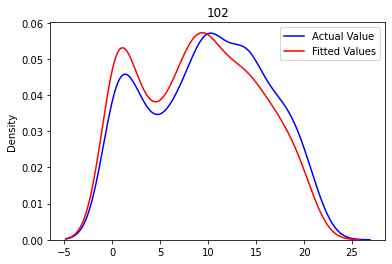

Station Number: 103
Accuracy:  67.88617886178862


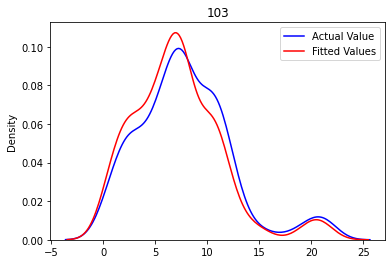

Station Number: 104
Accuracy:  66.80384087791495


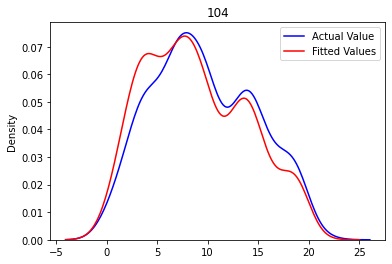

Station Number: 105
Accuracy:  64.42048517520216


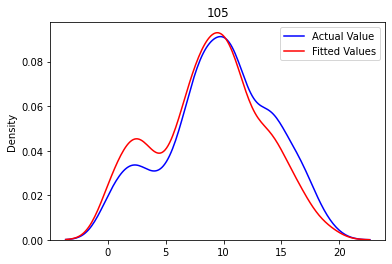

Station Number: 106
Accuracy:  56.26631853785901


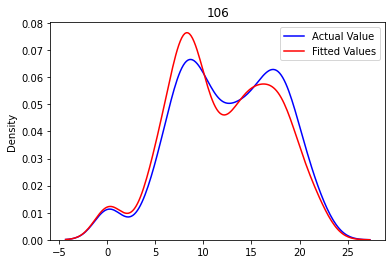

Station Number: 107
Accuracy:  46.95121951219512


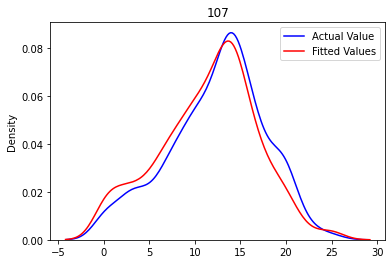

Station Number: 108
Accuracy:  47.4937343358396


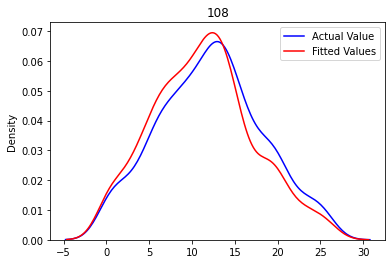

Station Number: 109
Accuracy:  45.05494505494506


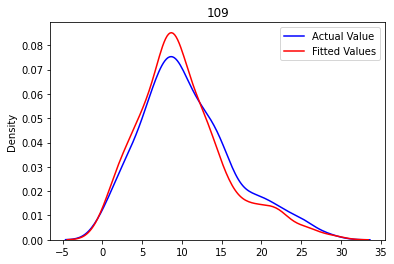

Station Number: 110
Accuracy:  48.3271375464684


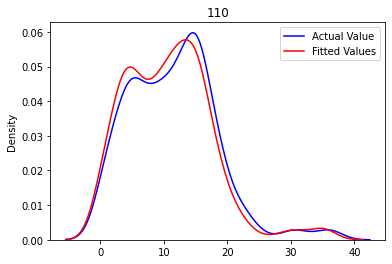

Station Number: 111
Accuracy:  42.78959810874704


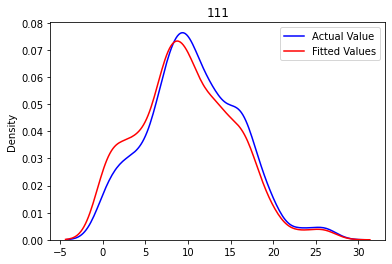

Station Number: 112
Accuracy:  30.87757313109426


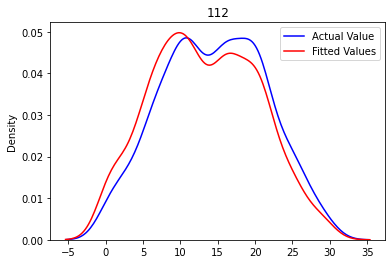

Station Number: 113
Accuracy:  62.0457604306864


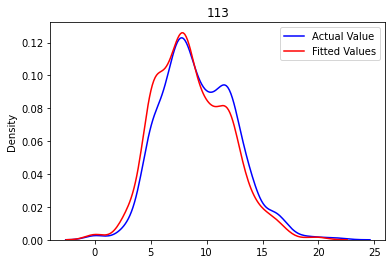

Station Number: 114
Accuracy:  50.0


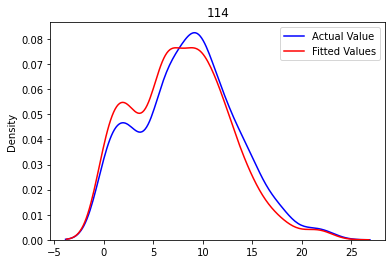

Station Number: 115
Accuracy:  39.0


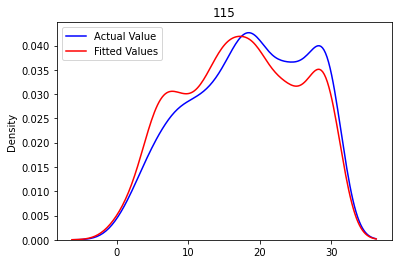

Station Number: 116
Accuracy:  58.05194805194805


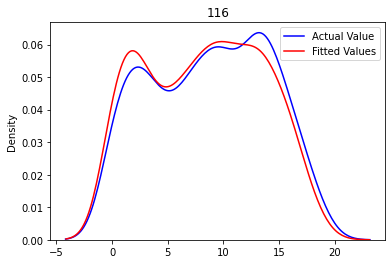

Station Number: 117
Accuracy:  67.50348675034867


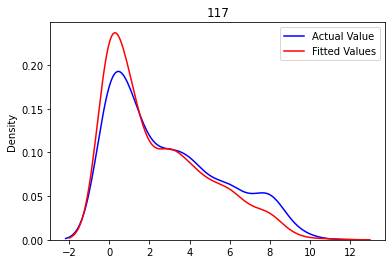

Station Number: 507
Accuracy:  80.48780487804879


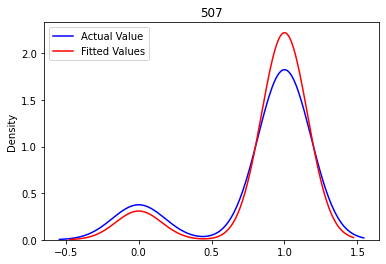

In [21]:
bikesDict={}
avg=0
for index in range(len(dfseperated)):
    stationNum = (dfseperated[index].iloc[0].StationNumber)
    X = np.array(dfseperated[index].drop(['StationNumber','available_bikes', 'available_bikes_stands'], 1))
    y = np.array(dfseperated[index][predict])
   
    x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)
    model = KNeighborsClassifier(n_neighbors=2)
    model.fit(x_train, y_train)
    
#     acc = model.score(x_test, y_test)  
    predicted = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, predicted)
    avg+=acc
    print("Station Number:", stationNum) 
    print("Accuracy: ",acc*100)
   
    ax = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
    sns.distplot(predicted, hist=False, color="r", label="Fitted Values" , ax=ax)
    plt.title(stationNum)
    plt.legend()
    plt.show()
    
    
    bikesDict[stationNum]=model
    filename=(str(stationNum) + "Bikes.pkl")
    with open(filename, "wb") as f:
        pickle.dump(model, f)
average_acc = avg/110


In [22]:
print("Average:", average_acc)

Average: 0.4861773871599262


__KNeighbors Classifier for Stands Available - Each station model stored in a dict__

Station Number: 2
Accuracy:  44.34889434889435


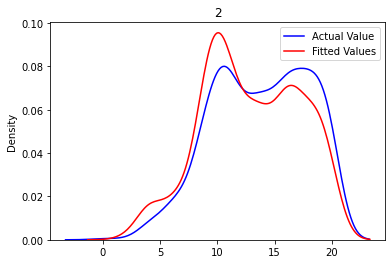

Station Number: 3
Accuracy:  45.289855072463766


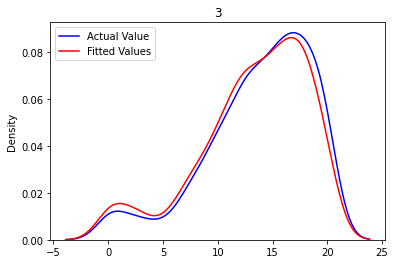

Station Number: 4
Accuracy:  48.399487836107554


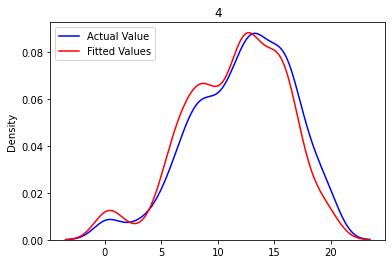

Station Number: 5
Accuracy:  31.322751322751323


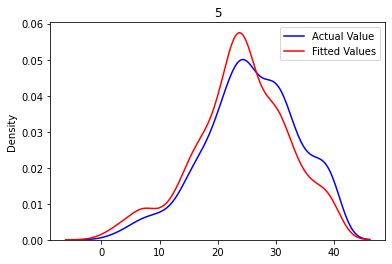

Station Number: 6
Accuracy:  49.813200498132005


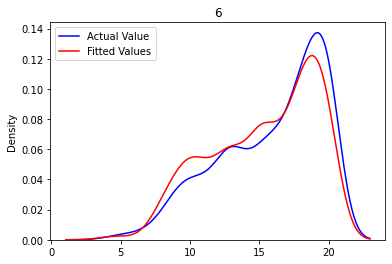

Station Number: 7
Accuracy:  53.196930946291566


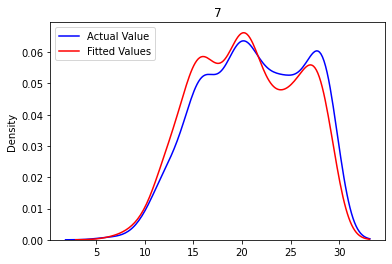

Station Number: 8
Accuracy:  42.92397660818714


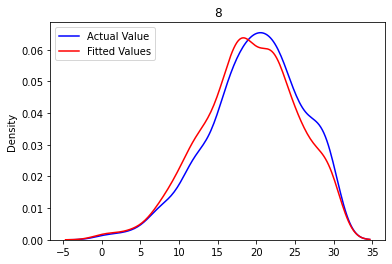

Station Number: 9
Accuracy:  32.98969072164948


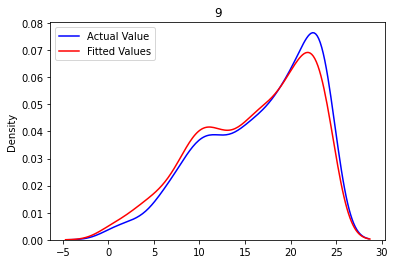

Station Number: 10
Accuracy:  39.016018306636155


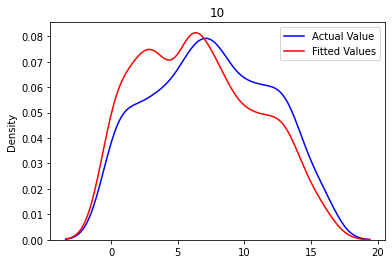

Station Number: 11
Accuracy:  66.66666666666666


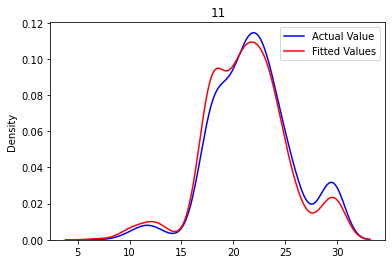

Station Number: 12
Accuracy:  44.37577255871446


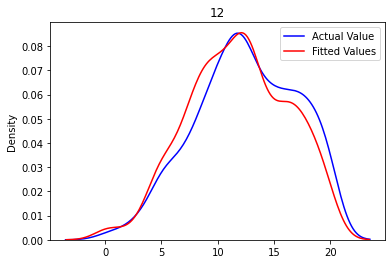

Station Number: 13
Accuracy:  62.5832223701731


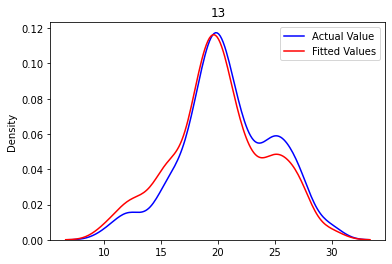

Station Number: 15
Accuracy:  55.223880597014926


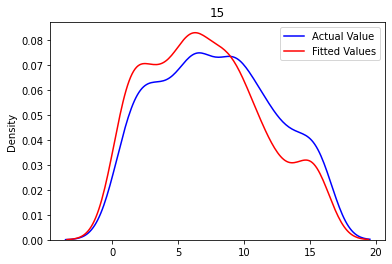

Station Number: 16
Accuracy:  57.37051792828686


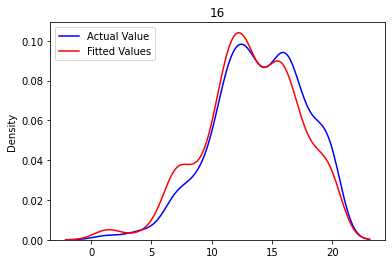

Station Number: 17
Accuracy:  48.43554443053817


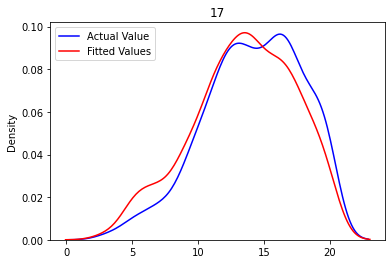

Station Number: 18
Accuracy:  36.577181208053695


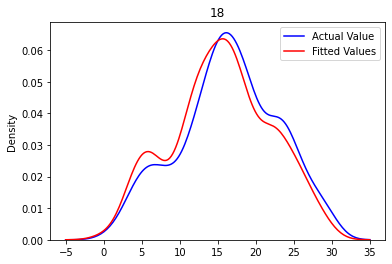

Station Number: 19
Accuracy:  31.908237747653807


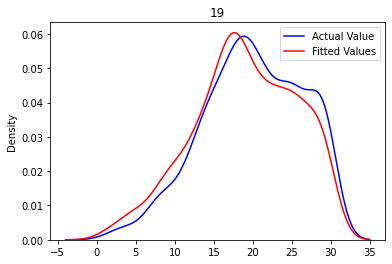

Station Number: 21
Accuracy:  43.411764705882355


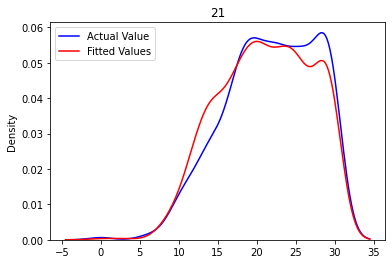

Station Number: 22
Accuracy:  45.252774352651045


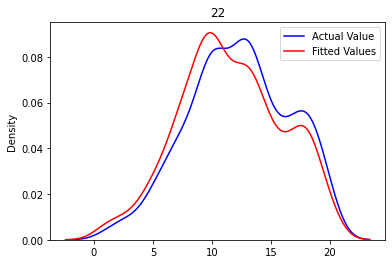

Station Number: 23
Accuracy:  40.45977011494253


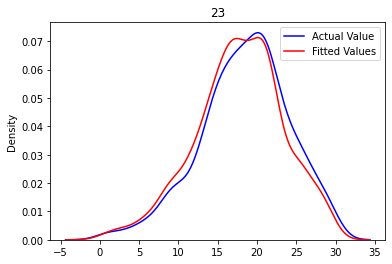

Station Number: 24
Accuracy:  35.41666666666667


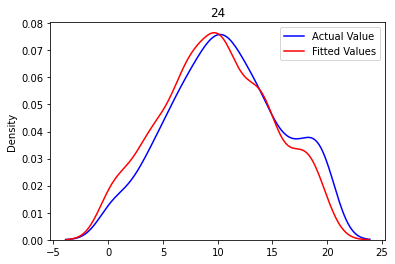

Station Number: 25
Accuracy:  55.398457583547554


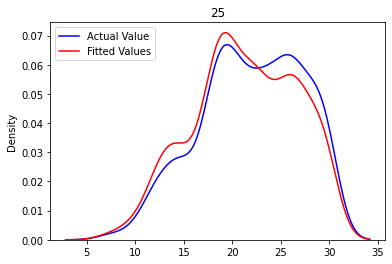

Station Number: 26
Accuracy:  55.87467362924282


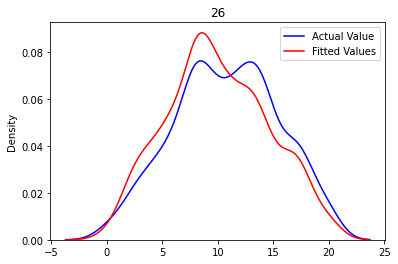

Station Number: 27
Accuracy:  46.56019656019656


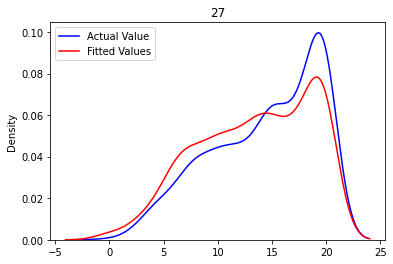

Station Number: 28
Accuracy:  43.57142857142857


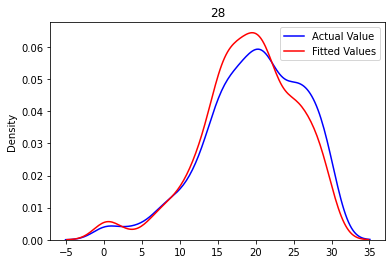

Station Number: 29
Accuracy:  34.417040358744394


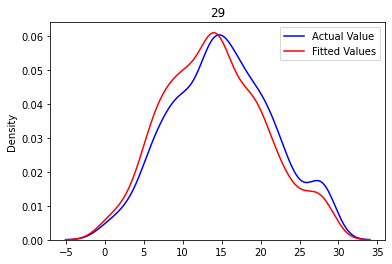

Station Number: 30
Accuracy:  57.29303547963206


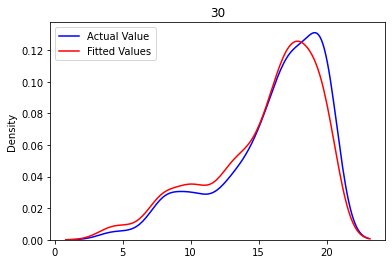

Station Number: 31
Accuracy:  34.166666666666664


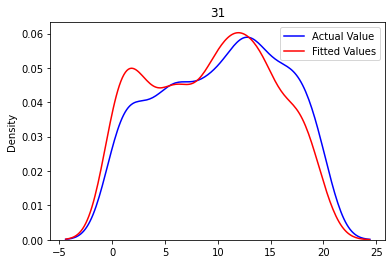

Station Number: 32
Accuracy:  44.632086851628465


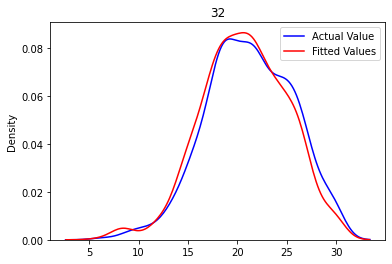

Station Number: 33
Accuracy:  28.27586206896552


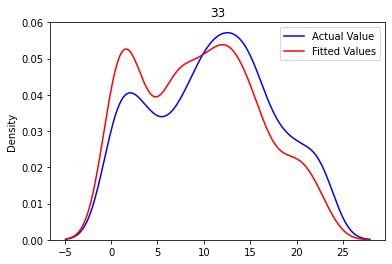

Station Number: 34
Accuracy:  27.559055118110237


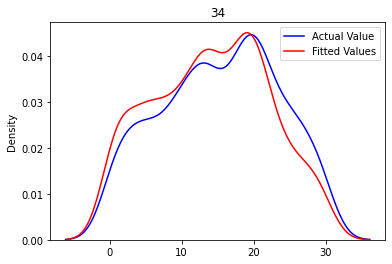

Station Number: 36
Accuracy:  53.72005044136192


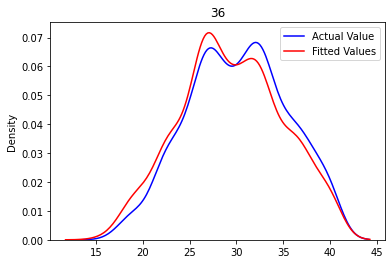

Station Number: 37
Accuracy:  61.06666666666667


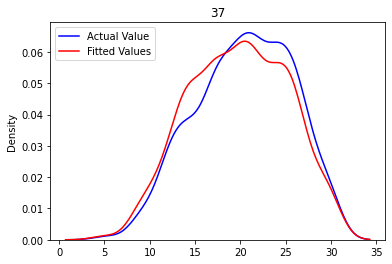

Station Number: 38
Accuracy:  38.1057268722467


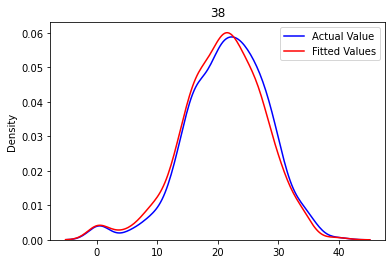

Station Number: 39
Accuracy:  41.00801832760595


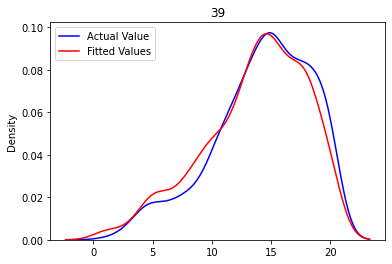

Station Number: 40
Accuracy:  41.76334106728538


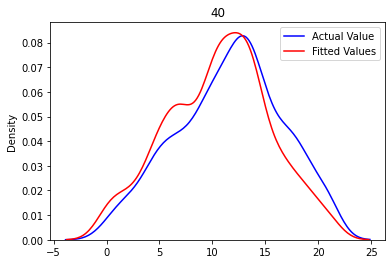

Station Number: 41
Accuracy:  59.70744680851063


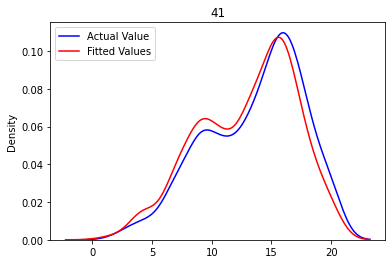

Station Number: 42
Accuracy:  34.508547008547005


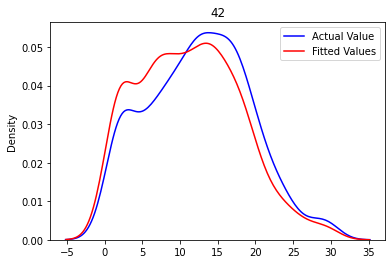

Station Number: 43
Accuracy:  39.565217391304344


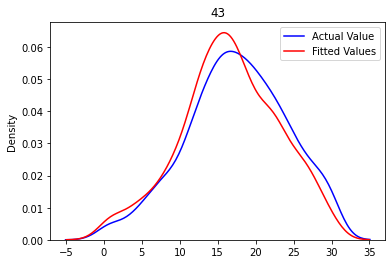

Station Number: 44
Accuracy:  28.82599580712788


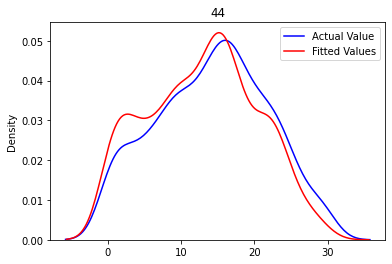

Station Number: 45
Accuracy:  47.75561097256858


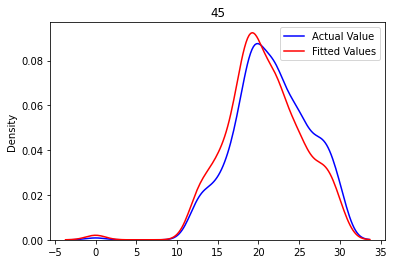

Station Number: 47
Accuracy:  58.87096774193549


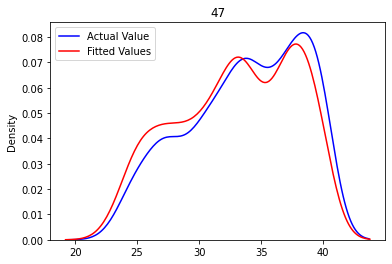

Station Number: 48
Accuracy:  41.785714285714285


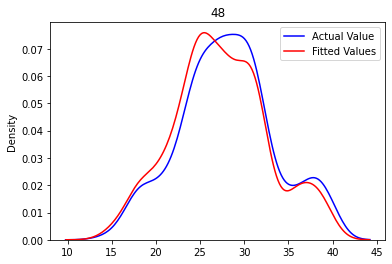

Station Number: 49
Accuracy:  38.93905191873589


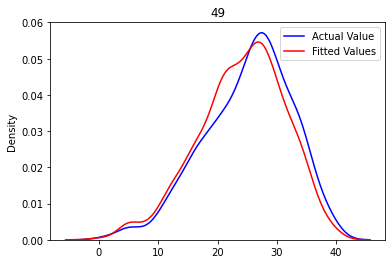

Station Number: 50
Accuracy:  35.382955771305284


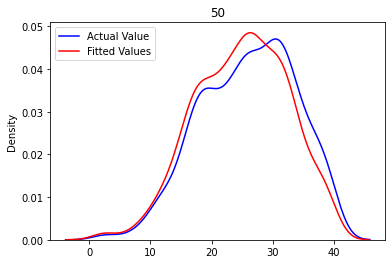

Station Number: 51
Accuracy:  55.84415584415584


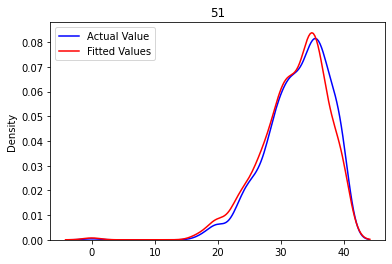

Station Number: 52
Accuracy:  38.55278766310795


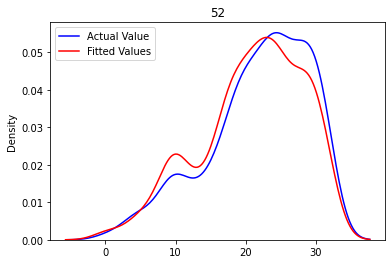

Station Number: 53
Accuracy:  65.93406593406593


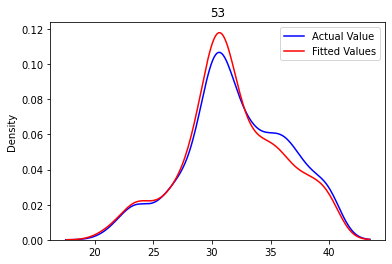

Station Number: 54
Accuracy:  62.22826086956522


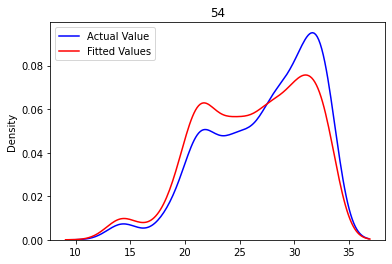

Station Number: 55
Accuracy:  70.88607594936708


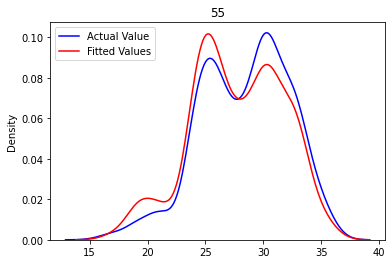

Station Number: 56
Accuracy:  36.31346578366446


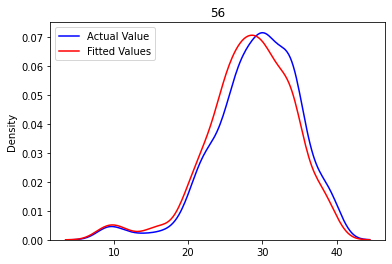

Station Number: 57
Accuracy:  58.517555266579976


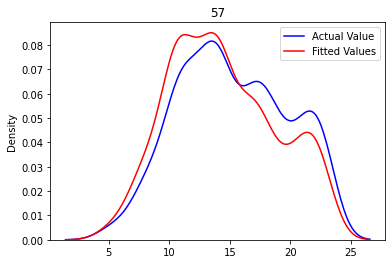

Station Number: 58
Accuracy:  38.74709976798144


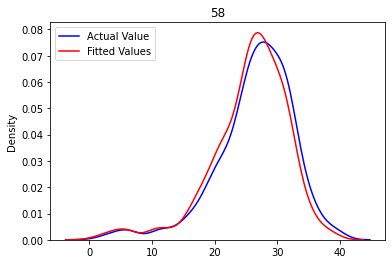

Station Number: 59
Accuracy:  46.7680608365019


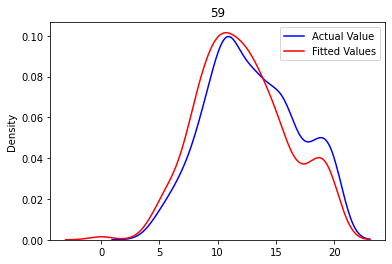

Station Number: 61
Accuracy:  56.666666666666664


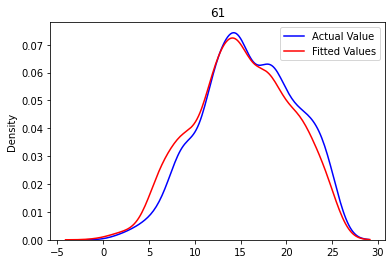

Station Number: 62
Accuracy:  65.02002670226969


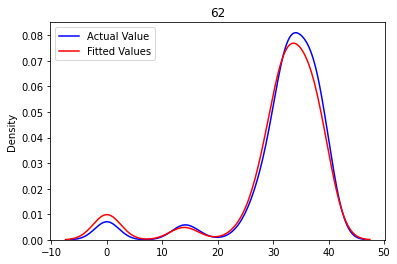

Station Number: 63
Accuracy:  56.88073394495413


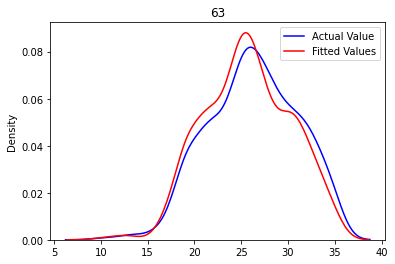

Station Number: 64
Accuracy:  46.48581997533909


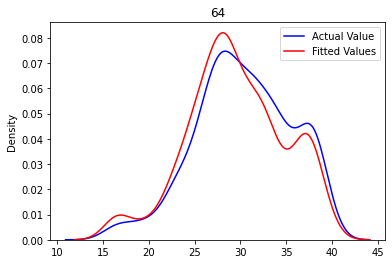

Station Number: 65
Accuracy:  58.894878706199464


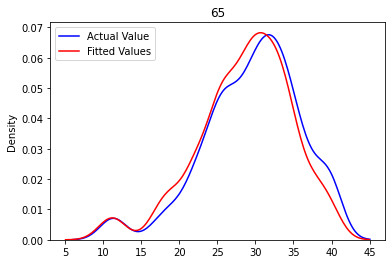

Station Number: 66
Accuracy:  36.64036076662909


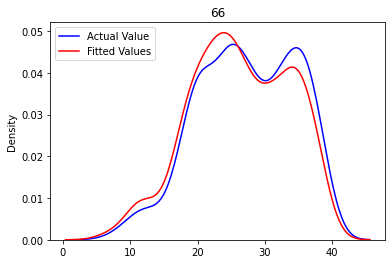

Station Number: 67
Accuracy:  36.65559246954596


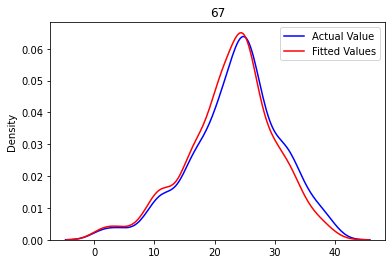

Station Number: 68
Accuracy:  39.05390539053906


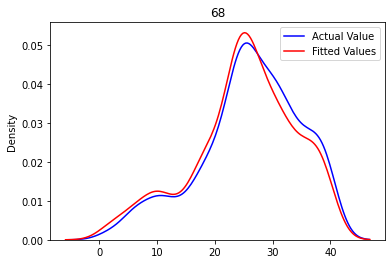

Station Number: 69
Accuracy:  27.358490566037734


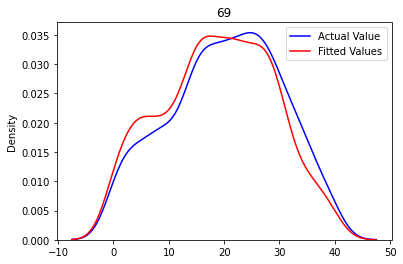

Station Number: 71
Accuracy:  44.44444444444444


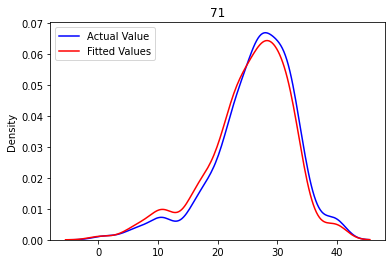

Station Number: 72
Accuracy:  39.7874852420307


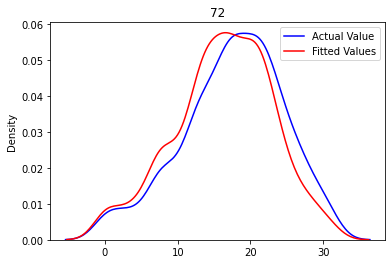

Station Number: 73
Accuracy:  40.851553509781354


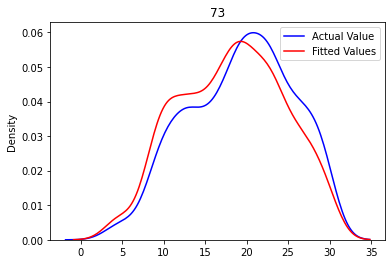

Station Number: 74
Accuracy:  44.60260972716489


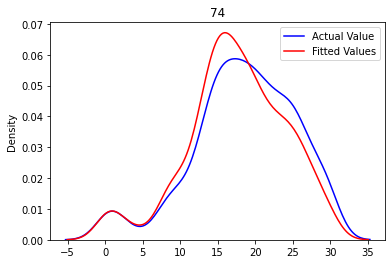

Station Number: 75
Accuracy:  42.14876033057851


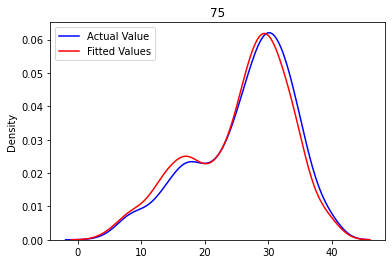

Station Number: 76
Accuracy:  52.48407643312102


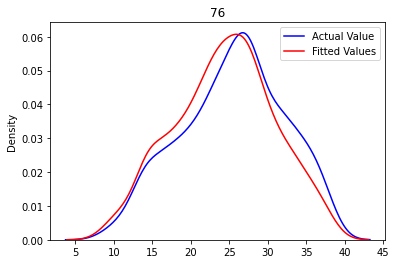

Station Number: 77
Accuracy:  42.94117647058823


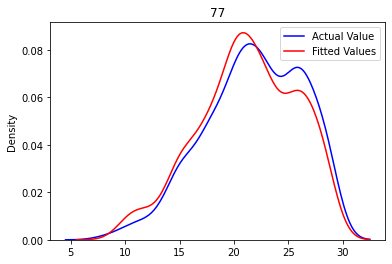

Station Number: 78
Accuracy:  37.906976744186046


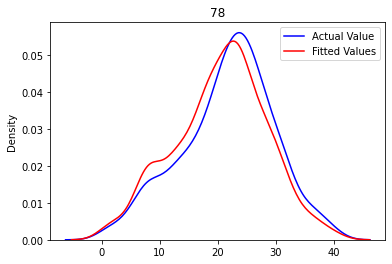

Station Number: 79
Accuracy:  53.746770025839794


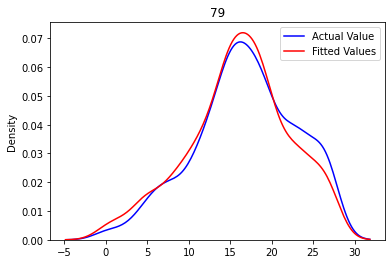

Station Number: 80
Accuracy:  43.309859154929576


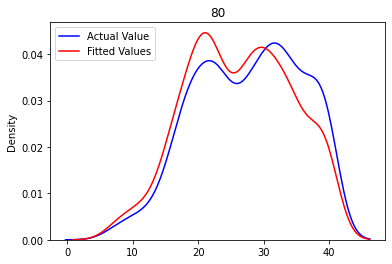

Station Number: 82
Accuracy:  58.63874345549738


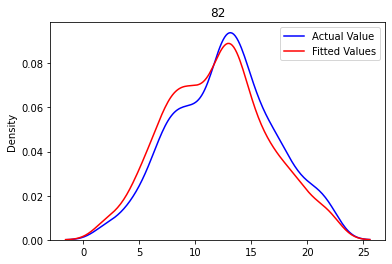

Station Number: 83
Accuracy:  51.35135135135135


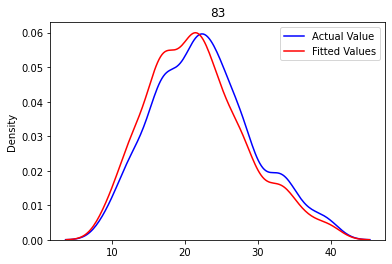

Station Number: 84
Accuracy:  47.648514851485146


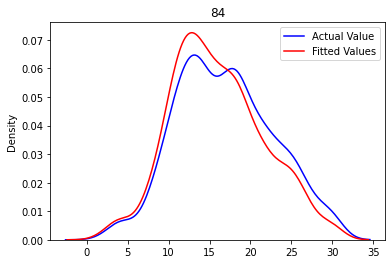

Station Number: 85
Accuracy:  52.35069885641678


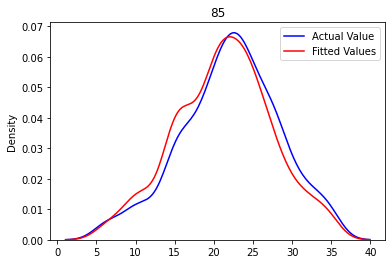

Station Number: 86
Accuracy:  41.56142365097589


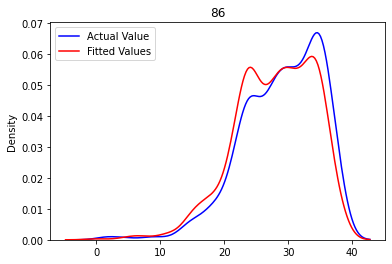

Station Number: 87
Accuracy:  44.806763285024154


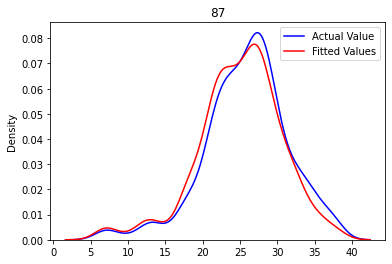

Station Number: 88
Accuracy:  46.78007290400972


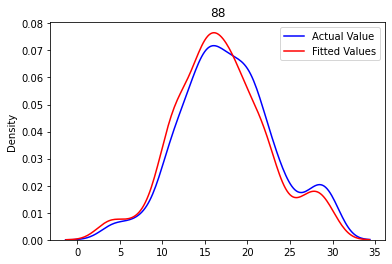

Station Number: 89
Accuracy:  62.201591511936336


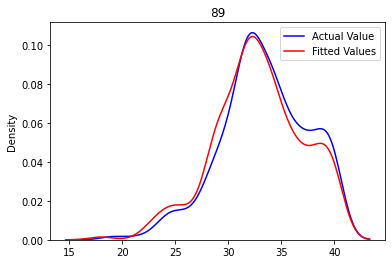

Station Number: 90
Accuracy:  44.84412470023981


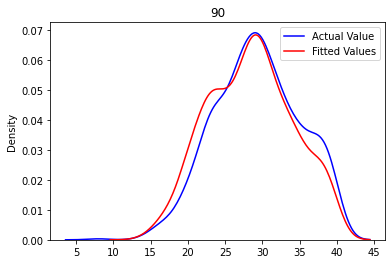

Station Number: 91
Accuracy:  35.67508232711306


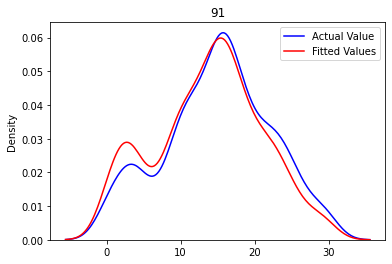

Station Number: 92
Accuracy:  42.47374562427071


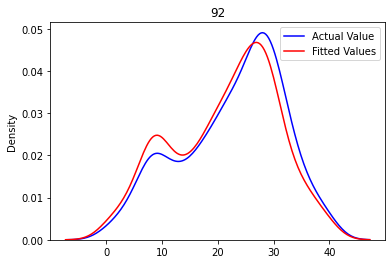

Station Number: 93
Accuracy:  81.49210903873745


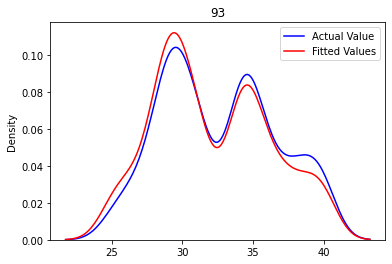

Station Number: 94
Accuracy:  75.67954220314735


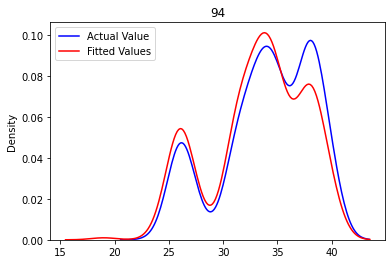

Station Number: 95
Accuracy:  42.123687281213535


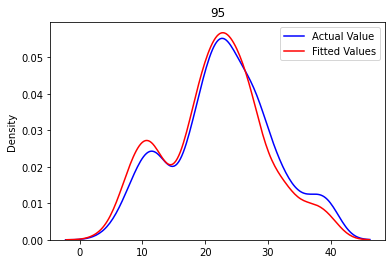

Station Number: 96
Accuracy:  61.904761904761905


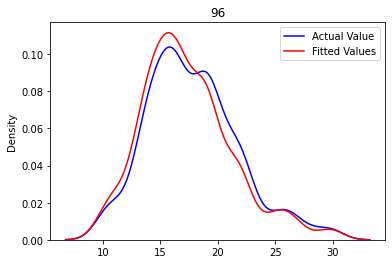

Station Number: 97
Accuracy:  40.022675736961446


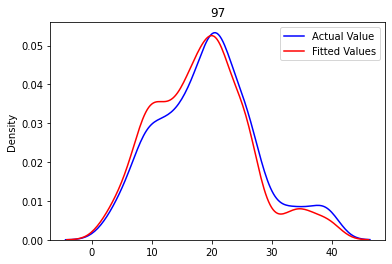

Station Number: 98
Accuracy:  62.14765100671141


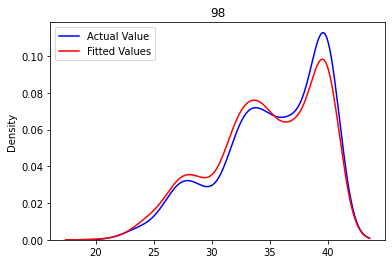

Station Number: 99
Accuracy:  60.47120418848168


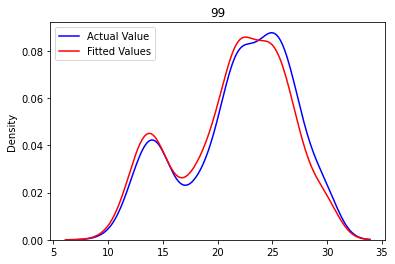

Station Number: 100
Accuracy:  47.19512195121951


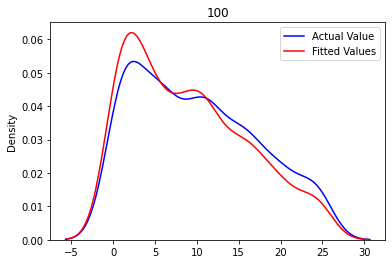

Station Number: 101
Accuracy:  42.27166276346605


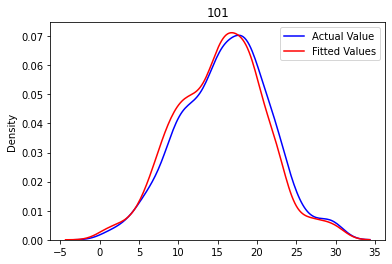

Station Number: 102
Accuracy:  57.180500658761524


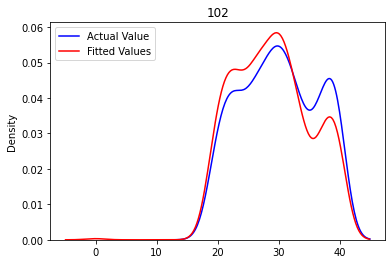

Station Number: 103
Accuracy:  60.70460704607046


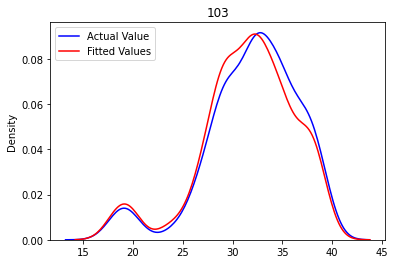

Station Number: 104
Accuracy:  65.4320987654321


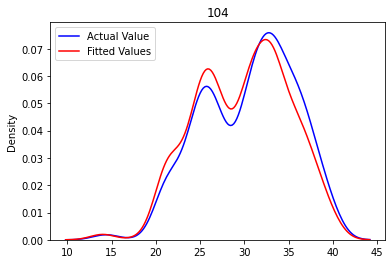

Station Number: 105
Accuracy:  62.3989218328841


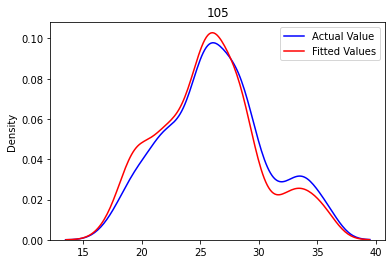

Station Number: 106
Accuracy:  56.26631853785901


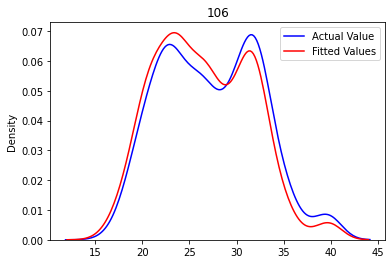

Station Number: 107
Accuracy:  45.487804878048784


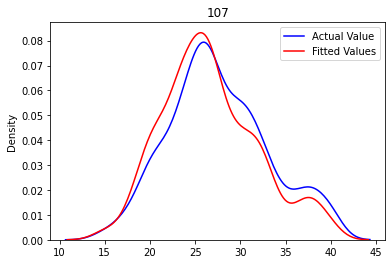

Station Number: 108
Accuracy:  48.99749373433584


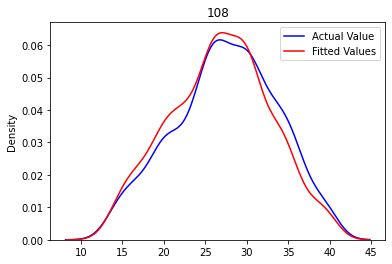

Station Number: 109
Accuracy:  44.56654456654457


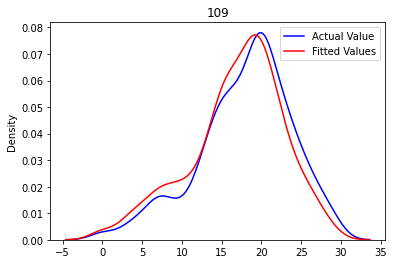

Station Number: 110
Accuracy:  43.12267657992565


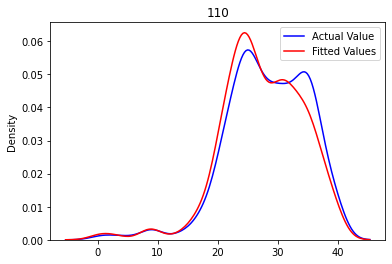

Station Number: 111
Accuracy:  40.543735224586285


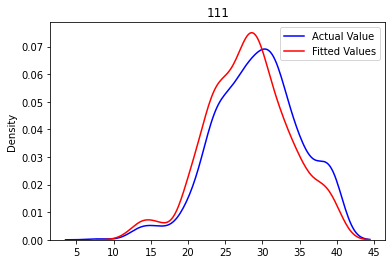

Station Number: 112
Accuracy:  32.3943661971831


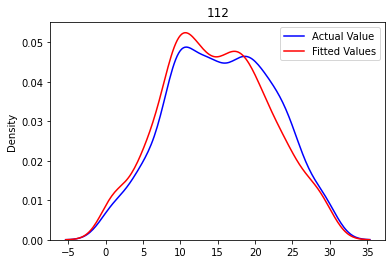

Station Number: 113
Accuracy:  65.1413189771198


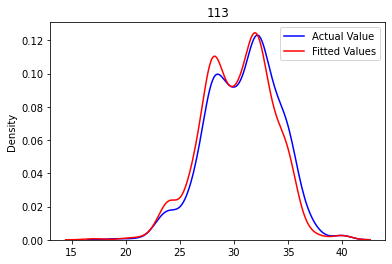

Station Number: 114
Accuracy:  51.91326530612245


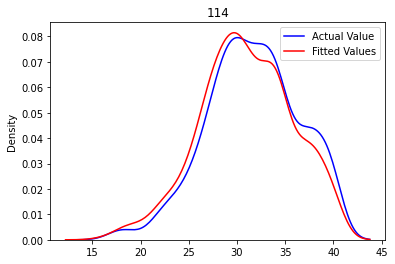

Station Number: 115
Accuracy:  39.33333333333333


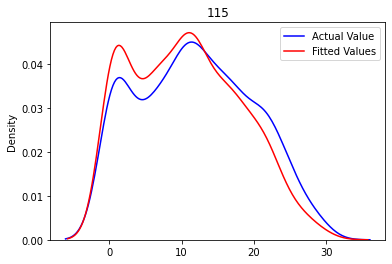

Station Number: 116
Accuracy:  53.116883116883116


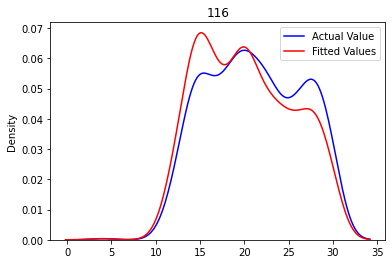

Station Number: 117
Accuracy:  67.22454672245468


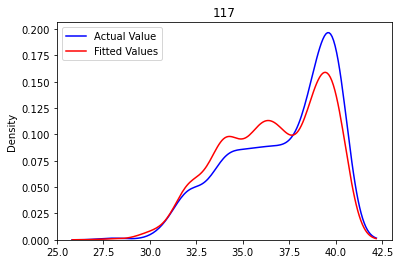

Station Number: 507
Accuracy:  87.8048780487805


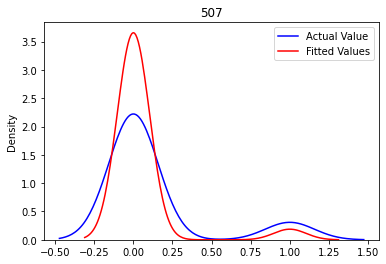

In [23]:
StandsDict={}
avg=0
for index in range(len(dfseperated)):
    stationNum = (dfseperated[index].iloc[0].StationNumber)
    X = np.array(dfseperated[index].drop(['StationNumber','available_bikes_stands', 'available_bikes'], 1))
    y = np.array(dfseperated[index][predictStands])
   
    x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)
    model = KNeighborsClassifier(n_neighbors=2)
    model.fit(x_train, y_train)
    
    predicted = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, predicted)
    avg+=acc
    print("Station Number:", stationNum) 
    print("Accuracy: ",acc*100)
   
    ax = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
    sns.distplot(predicted, hist=False, color="r", label="Fitted Values" , ax=ax)
    plt.title(stationNum)
    plt.legend()
    plt.show()
    
    StandsDict[stationNum]=model
    filename=(str(stationNum) + "Stands.pkl")
    with open(filename, "wb") as f:
        pickle.dump(model, f)
average_acc = avg/110

In [24]:
print("Average:", average_acc)

Average: 0.4824252869347834
